In [1]:
''' Notebook to demonstrate basic modeling with scikit-learn '''

' Notebook to demonstrate basic modeling with scikit-learn '

In [9]:
import pandas as pd
from stop_words import get_stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [10]:
df = pd.read_csv('sample_tweets.csv', encoding='latin-1')

In [96]:
from sklearn.naive_bayes import GaussianNB

subset = df.sample(n=5000)

stop_words = get_stop_words('en')

word_vectorizer = CountVectorizer(ngram_range=(1,3), stop_words=stop_words)
tfidf_transformer = TfidfTransformer(use_idf=True)

word_doc_matrix = word_vectorizer.fit_transform(subset.text)
features = tfidf_transformer.fit_transform(word_doc_matrix)

model = GaussianNB()

# Train the model 
classifier = model.fit(features.toarray(), subset.sentiment)

In [76]:
def predict_sentiment(new_tweets):
    counts = word_vectorizer.transform(new_tweets)
    tfidfs = tfidf_transformer.transform(counts)
    predictions = classifier.predict(tfidfs.toarray())
    return predictions

In [77]:
predict_sentiment(['i hate life', 'i do not want to go to work', 'i love cupcakes'])

array([0, 0, 0])

In [78]:
predict_sentiment(['yay i am so excited to eat cupcakes'])

array([4])

In [79]:
test_tweets = df.sample(n=500)
test_tweets.head(10)

,sentiment,text
6627,4,julidamizing - for those who know
982,0,Synching my contacts from my old mobile to iPh...
4878,0,It's too cold for spring
676,0,@JustGelo Its sad knowing how they found her b...
2568,0,@Ainz_dj mate what time you gettin there? not ...
5225,4,"@limelightfood I saw that. As soon as I asked,..."
4473,0,My first TimTam in over a year has gone down v...
4246,0,"@SarahNicholas poor you, I once asked for pale..."
6017,4,wanne look at how my lovely anak cina looks li...
4300,0,HATES Othello and needs 5 language features + ...


In [80]:
test_predictions = predict_sentiment(test_tweets.text)

In [81]:
test_predictions[:10]

array([0, 0, 0, 0, 4, 0, 0, 4, 0, 0])

In [82]:
from sklearn.metrics import accuracy_score

accuracy_score(test_tweets.sentiment, test_predictions)

0.628

In [83]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(test_tweets.sentiment, test_predictions)

In [84]:
confusion_mat

array([[178,  75],
       [111, 136]])

In [85]:
# True positives (they were happy, we predicted happy)
TP = confusion_mat[1][1]

# True negatives (they were sad, we predicted sad)
TN = confusion_mat[0][0]

# False positives (they were sad, we predicted happy)
FP = confusion_mat[0][1]

# False negatives (they were happy, we predicted sad)
FN = confusion_mat[1][0]

print('True positives:', TP)
print('True negatives:', TN)
print('False positives:', FP)
print('False negatives:', FN)

True positives: 136
True negatives: 178
False positives: 75
False negatives: 111


In [86]:
# True positive rate = how often are we correct when they're happy?
TP_rate = TP / float(TP + FN)

# False positive rate = how often are we getting it wrong when they're sad?
FP_rate = FP / float(TN + FP)

TP_rate, FP_rate

(0.55060728744939269, 0.29644268774703558)

In [87]:
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt
%matplotlib inline

fp_rate, tp_rate, _ = roc_curve(test_tweets.sentiment == 4, test_predictions == 4)

In [88]:
fp_rate, tp_rate

(array([ 0.        ,  0.29644269,  1.        ]),
 array([ 0.        ,  0.55060729,  1.        ]))

In [89]:
plt.figure();

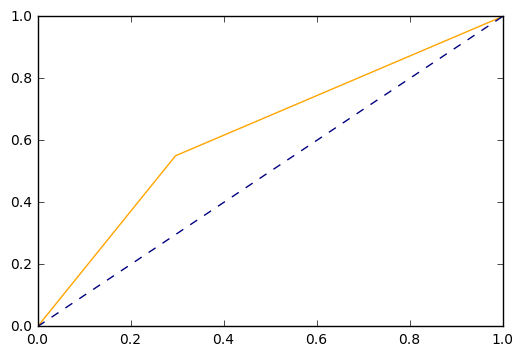

In [90]:
plt.plot(fp_rate, tp_rate, color='orange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

In [94]:
from sklearn.metrics import roc_auc_score

In [95]:
roc_auc_score(test_tweets.sentiment == 4, test_predictions == 4)

0.62708229985117847